# Symbolic Field Notebook

In [1]:
%matplotlib widget

import numpy as np
import sympy as sp

from mechpy.core.symbolic.coord import (
    SymbolicCartesianCoordSystem,
    SymbolicCylindricalCoordSystem,
)

from mechpy.core.symbolic.field import (
    SymbolicScalarField,
    SymbolicVectorField,
    SymbolicTensorField,
)

## Symbolic Field

### Linear Scalar Field

In [2]:
data = sp.Array([1, 2, 3])
scalar_field = SymbolicScalarField.create_linear(data=data)
display(scalar_field.data)

[x + 2*y + 3*z]

### Non Linear Scalar Field

In [3]:
coord_system = SymbolicCartesianCoordSystem()
display(coord_system)

SymbolicCartesianCoordSystem(origin=(0, 0, 0), basis=(x, y, z))

In [4]:
x1, x2, x3 = coord_system.basis
f = x1*x1 - x2*x2
display(f)

x**2 - y**2

In [5]:
data = sp.Array([f])
scalar_field = SymbolicScalarField.create(coord_system=coord_system, data=data)
display(scalar_field)

SymbolicScalarField(
(x, y, z),
[x**2 - y**2],
{})

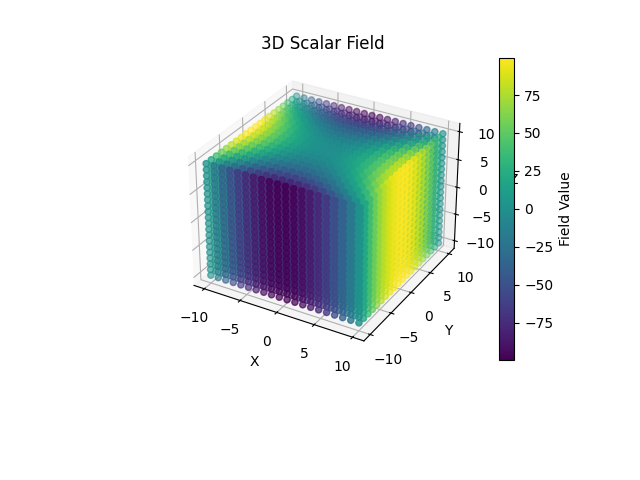

In [6]:
scalar_field.plot()

---

In [7]:
coord_system = SymbolicCylindricalCoordSystem()
display(coord_system)

SymbolicCylindricalCoordSystem(origin=(0, 0, 0), basis=(r, theta, z))

In [8]:
x1, x2, x3 = coord_system.basis
f = x1 + x3*x3
display(f)

r + z**2

In [9]:
data = sp.Array([f])
scalar_field = SymbolicScalarField.create(coord_system, data)
display(scalar_field)

SymbolicScalarField(
(r, theta, z),
[r + z**2],
{})

SymbolicScalarField(
(x, y, z),
[z**2 + sqrt(x**2 + y**2)],
{})

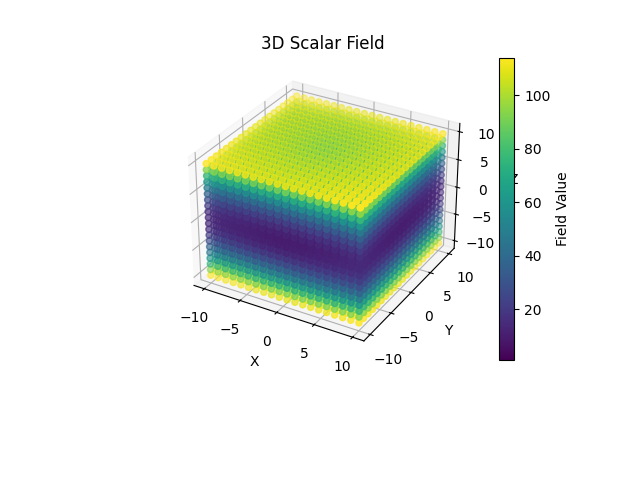

In [10]:
scalar_field = scalar_field.to_cartesian()
display(scalar_field)
scalar_field.plot()

### Linear Vector Field

In [11]:
data = sp.Array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
vector_field = SymbolicVectorField.create_linear(data=data)
display(vector_field.data)

[x + 2*y + 3*z, 4*x + 5*y + 6*z, 7*x + 8*y + 9*z]

In [12]:
vector_field.plot()

### Linear Tensor Field

In [13]:
data = sp.Array(
    [
        [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
        [[11, 12, 13], [14, 15, 16], [17, 18, 19]],
        [[21, 22, 23], [24, 25, 26], [27, 28, 29]],
    ]
)
display(data.shape)
tensor_field = SymbolicTensorField.create_linear(data=data)
display(tensor_field.data)

(3, 3, 3)

[[x + 2*y + 3*z, 4*x + 5*y + 6*z, 7*x + 8*y + 9*z], [11*x + 12*y + 13*z, 14*x + 15*y + 16*z, 17*x + 18*y + 19*z], [21*x + 22*y + 23*z, 24*x + 25*y + 26*z, 27*x + 28*y + 29*z]]

### Field with params

SymbolicScalarField(
(x, y, z),
[-2*m*y + n*x],
{n: None, m: None})

SymbolicScalarField(
(x, y, z),
[3*x],
{})

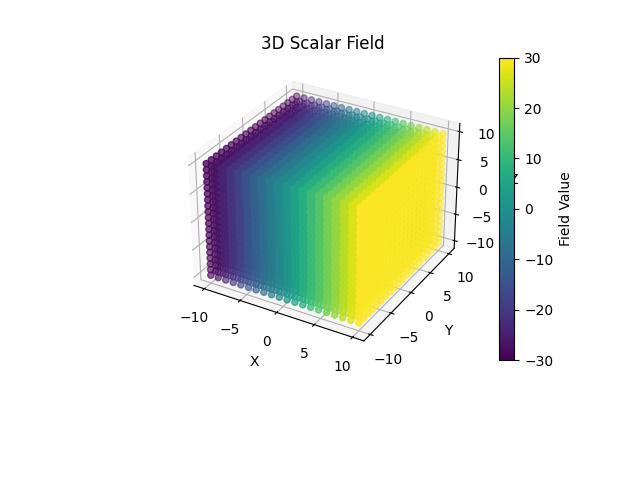

In [14]:
n, m = sp.symbols("n m")
field_params = {
    n: None,
    m: None,
}
data = sp.Array([1 * n, -2 * m, 0])
linear_scalar_field = SymbolicScalarField.create_linear(
    data=data,
    field_params=field_params,
)
display(linear_scalar_field)
linear_scalar_field.subs_field_params({n: 3})
linear_scalar_field.subs_field_params({m: 0})
display(linear_scalar_field)
linear_scalar_field.plot()

### Ploting field with params

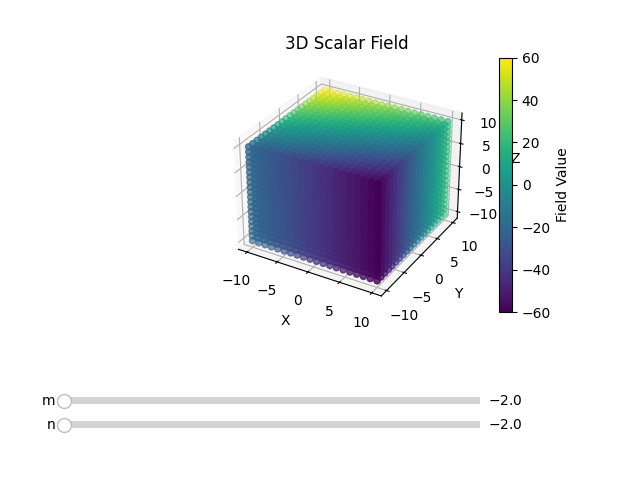

In [15]:
n, m = sp.symbols("n m")
field_params = {
    n: set(np.arange(-2, 2, 0.3)),
    m: set(np.arange(-2, 2, 0.3)),
}
data = sp.Array([1 * n, -2 * m, 0])
linear_scalar_field = SymbolicScalarField.create_linear(
    data=data,
    field_params=field_params,
)
linear_scalar_field.plot()